## Karthika Pai

# Understanding college debt
I want to see what types of universities have students in debt.  We will be using the college scorecard API from data.gov.  I am interested in a number of variables, these are admissions rate, tuition, median household income, student size, etc.

It seems that the UC office of president <a href="http://www.ucop.edu/institutional-research-academic-planning/_files/College%20Scorecard%20Brief.pdf">claims that the UC schools are a good deal</a> based on data from the college scorecard.

You should go begin by getting an <a href="https://api.data.gov/signup/">API key for data.gov</a>.  There are many data.gov APIs that you can use this key for and they have fairly relaxed limits on the number of requests.

The documentation for the API can be found here...<br>
https://github.com/RTICWDT/open-data-maker/blob/master/API.md<br>
https://collegescorecard.ed.gov/data/

Let's import some packages.

In [1]:
from urllib2 import Request, urlopen
from urlparse import urlunparse, urlparse
import pandas as pd
import json
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Here are some variable names that we will be interested in.

In [2]:
varnames = """id
school.name
school.degrees_awarded.predominant
2014.admissions.admission_rate.overall
2014.cost.tuition.in_state
2014.cost.tuition.out_of_state
2014.aid.median_debt.completers.overall
2014.aid.median_debt.noncompleters
2005.student.demographics.median_hh_income
2005.student.demographics.poverty_rate
2014.aid.federal_loan_rate
2014.aid.pell_grant_rate
2014.student.size"""

__Exercise (1)__ I would like to make a complicated query from the API.  An example query from the API is 

<pre>https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.predominant=3&_fields=school.name,
2014.aid.pell_grant_rate&_sort=2014.student.size:desc&_page=1
&_per_page=100&api_key=YOURKEY
</pre>

Which can be parsed as  
1. the base url: https://api.data.gov/ed/collegescorecard/v1/schools.json, 
2. a filter of school.degrees_awarded.predominant=3, 
3. return the fields school.name,2014.aid.pell_grant_rate, 
4. sort by 2014.student.size in descending order, 
5. return 1 page of 100 entries, 
6. and use your api key

You can find a more complete description: https://github.com/RTICWDT/open-data-maker/blob/master/API.md

Fill in the following def that fits the following docstring, and gives the shown output.
<pre>
def query_url(key,fieldnames,filterstring,sortvar,numpages):
    """
    This takes all of the necessary parameters to form a query 
    to college scorecard
    Input: key (data.gov API key, string), fieldnames (list of variable 
      names), filterstring (string for filtering), sortvar (variable to 
      sort with by descending), numpages (number of pages to return)
    Output: url (string)
    """


query_url(key,fieldnames,'school.degrees_awarded.predominant=3',
  '2014.student.size',2)

https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.predominant=3&_fields=id,school.name,school.degrees_awarded.predominant,school.degree_urbanization,2014.admissions.admission_rate.overall,2014.cost.tuition.in_state,2014.cost.tuition.out_of_state,2014.aid.median_debt.completers.overall,2014.aid.median_debt.noncompleters,2005.student.demographics.median_hh_income,2005.student.demographics.poverty_rate,2014.aid.federal_loan_rate,2014.aid.pell_grant_rate,2014.student.size&_page=2&_per_page=100&_sort=2014.student.size:desc&api_key=YOURKEYHERE
</pre>

Try to reproduce the above behavior.

In [3]:
key='sample' ## TA, PLEASE PUT KEY replacing sample here

def query_url(key,fieldnames,filterstring,sortvar,numpages):
    """
    This takes all of the necessary parameters to form a query 
    to college scorecard
    Input: key (data.gov API key, string), fieldnames (list of variable 
      names), filterstring (string for filtering), sortvar (variable to 
      sort with by descending), numpages (number of pages to return)
    Output: url (string)
    """
    urll = list(urlparse("https://api.data.gov/ed/collegescorecard/v1/schools.json"))
    params_string = "{}&_fields={}&_page={}&_per_page=100&_sort={}:desc&api_key={}"
    params = params_string.format(filterstring, ','.join(fieldnames.splitlines()), numpages, sortvar, key )
    urll[4] = params
    return urlunparse(urll)
    
query_string = query_url(key,varnames,'school.degrees_awarded.predominant=3',
  '2014.student.size',2) 
query_string

'https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.predominant=3&_fields=id,school.name,school.degrees_awarded.predominant,2014.admissions.admission_rate.overall,2014.cost.tuition.in_state,2014.cost.tuition.out_of_state,2014.aid.median_debt.completers.overall,2014.aid.median_debt.noncompleters,2005.student.demographics.median_hh_income,2005.student.demographics.poverty_rate,2014.aid.federal_loan_rate,2014.aid.pell_grant_rate,2014.student.size&_page=2&_per_page=100&_sort=2014.student.size:desc&api_key=y5u4pp9U5B484KIEVXFA5SziGHd8hxaAs7r7qiSg'

__Exercise (2)__ Make the query using Request and load the results into a DataFrame that makes sense.

In [4]:
def analyze(qs):
    """
    This takes the query string generated by above string and returns a
    json object.
    Input: URL query string   
    Output: json dict object
    """
    request = Request(qs)
    response = urlopen(request)
    rr = json.loads(response.read())
    return rr

data_json = analyze(query_string)
columns_names = varnames.splitlines() #split varname array 
data = [] #empty data array
for row in data_json['results']:
    selected_row = []
    for items in columns_names:
        selected_row.append(row[items]) #go through each key of data
                                    #and append to array
    data.append(selected_row) #apend array into larger array

universities = pd.DataFrame(data, columns=columns_names)
final = universities.set_index(universities['school.name']) #set index to school name
del final.index.name, final['school.name'] 
final.columns = ['id', 'predominant degree', 'admission rate', 
                 'in state cost', 'out of state cost',
                     'median debt completers', 
                 'median debt non completers', 'median income',
                     'poverty rate', 'federal loan rate', 
                 'pell grant rate', 'student size']

final
    


,id,predominant degree,admission rate,in state cost,out of state cost,median debt completers,median debt non completers,median income,poverty rate,federal loan rate,pell grant rate,student size
Universidad Del Este,243346,3,NaN,5580,5580,6789.5,3275.0,21682.0,43.689999,0.3931,0.8644,12198
University of Massachusetts-Lowell,166513,3,0.6201,12447,27400,25000.0,10422.0,76546.0,6.540000,0.5744,0.2884,12190
CUNY City College,190567,3,0.3806,6389,13199,11551.0,7000.0,48071.0,21.600000,0.2225,0.5180,12175
New Mexico State University-Main Campus,188030,3,0.6960,5950,19112,18340.0,7624.0,43867.0,17.799999,0.4002,0.4191,12171
University of Massachusetts-Boston,166638,3,0.7077,11966,28390,NaN,NaN,68463.0,9.010000,0.5523,0.3857,12108
Wright State University-Main Campus,206604,3,NaN,8730,16910,25000.0,9500.0,61970.0,6.550000,0.5498,0.3790,12090
University of Puerto Rico-Rio Piedras,243221,3,0.2817,2019,4040,5500.0,5500.0,20501.0,45.730000,0.0858,0.5804,12086
Indiana University of Pennsylvania-Main Campus,213020,3,0.9473,9470,20965,27000.0,11000.0,54158.0,7.800000,0.7244,0.3666,12032
University of Nebraska at Omaha,181394,3,0.7850,6750,18070,20000.0,8000.0,66043.0,5.360000,0.4500,0.3260,11989
Saint Leo University,137032,3,0.7216,20420,20420,25000.0,9500.0,58178.0,8.880000,0.6032,0.4828,11976


__Exercise (3)__ Produce scatterplots to demonstrate the associations between student debt (for 'completers') and median household income, pell grant rates, student poverty rate, tuition, and federal loan rate.  Do you have an explanation for the associations that you are seeing?  Are there some surprising associations.

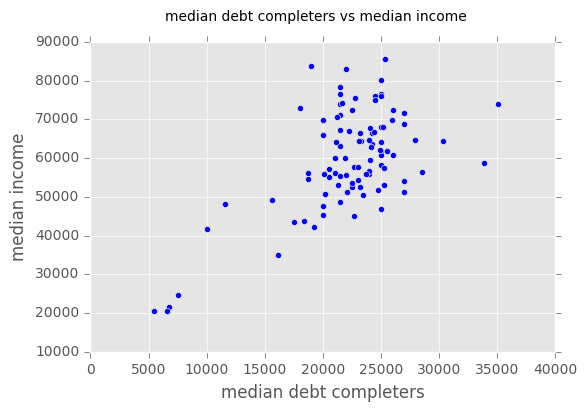

In [5]:
plt.scatter(final['median debt completers'], final['median income'])
plt.suptitle('median debt completers vs median income')
plt.xlabel('median debt completers')
plt.ylabel('median income')
plt.show()

One interesting correlation I seem to see in these two comparisons is that colleges with students that have high student debts also tend to have students to have higher incomes. This probably makes sense that with students have higher income, they can pay more tuition and colleges can use the tuition to pay and give more aid to students with loans etc. Also, high debt for a student is due to the fact that that person has a high enough income to afford it.

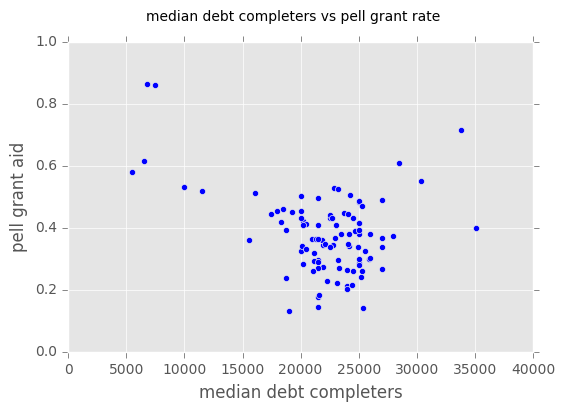

In [6]:
plt.scatter(final['median debt completers'], final['pell grant rate'])
plt.suptitle('median debt completers vs pell grant rate')
plt.xlabel('median debt completers')
plt.ylabel('pell grant aid')
plt.show()

We know that federal Pell Grants are usually awarded only to undergraduate students. The amount of aid you can receive depends on your financial need, the cost of attendance at your school, and more. So there doesn't seem to be a somewhat linear corrlation, as seen in the first graph. What is surprising is that pell grant rates to colleges seem to be below 0.5 and seem to be given to colleges with students that have debts of 150k to 300k median aid. We can also see that majority of colleges have student bodies with less than 60% recieving pell grants. 

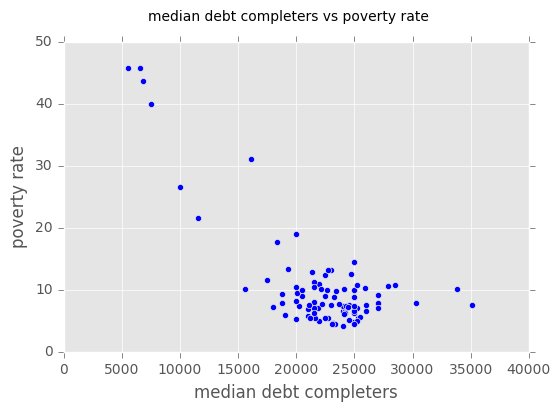

In [7]:
plt.scatter(final['median debt completers'], final['poverty rate'])
plt.suptitle('median debt completers vs poverty rate')
plt.xlabel('median debt completers')
plt.ylabel('poverty rate')
plt.show()

This chart seems to argue that generally, colleges with high student debt student bodies have students with low poverty rates, which makes sense. Students that do not have debt are either students who are really poor and cannot be given loans; it is more likely to be given a loan if you have higher incomes

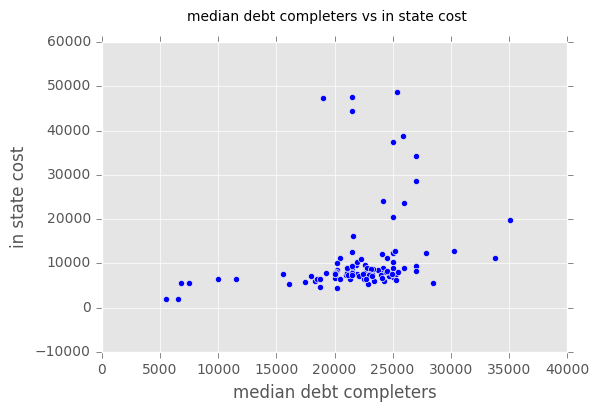

In [8]:
plt.scatter(final['median debt completers'], final['in state cost'])
plt.suptitle('median debt completers vs in state cost')
plt.xlabel('median debt completers')
plt.ylabel('in state cost')
plt.show()

This chart seems to argue that the majority of colleges' in state tuition is below 10k and that the general trend is to have bout 150k to 300k in student. However, even if some colleges have high tuitions (50k), they still tend to have the same median student debt as colleges with lower tuitions (10k), which is surprising.

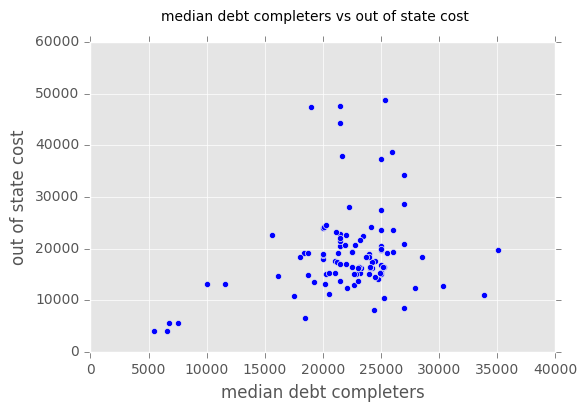

In [9]:
plt.scatter(final['median debt completers'], final['out of state cost'])
plt.suptitle('median debt completers vs out of state cost')
plt.xlabel('median debt completers')
plt.ylabel('out of state cost')
plt.show()

There seems to be a greater difference in this chart compared to the median debt vs in state cost; there seems to be a greater variation in the data. We can see that the spread of out of state cost is very high (5k to 50k) compared to mostly < 10k cost of in state tutition.  We see that out of state students seem to have more debt, probably because of the higher tuition. The trend in median aid seems to be also varied as well, though the majority of aid seems to be concentrated between 150k and 300k.

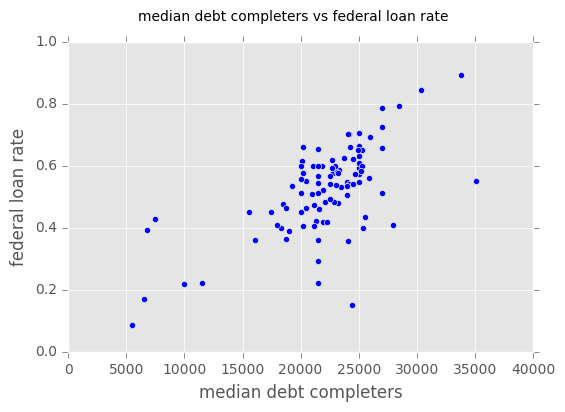

In [10]:
plt.scatter(final['median debt completers'], final['federal loan rate'])
plt.suptitle('median debt completers vs federal loan rate')
plt.xlabel('median debt completers')
plt.ylabel('federal loan rate')
plt.show()

There seems to a 1 to 1 linear relation between percentage of students in a college that depend on federal loans vs the median debt students have in college. In general, college that have larger student debt ratios also tend to have a greater percentage of students who depend also on federal loans. This makes sense that students who have larger debts will get their loans from places that can offer large amounts of money, such as the federal government.